In [3]:
from product_sub.infrastructure.dataset_builder import DatasetBuilder
from product_sub.domain.pipeline_creator import PipelineCreator
import product_sub.settings as stg

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error, plot_confusion_matrix

from imblearn.over_sampling import SMOTE 

import pandas as pd

In [4]:
dataset_merged = DatasetBuilder(
    filename_bank=stg.FILENAME_BANK, filename_socio=stg.FILENAME_SOCIO_ECO
).create_dataset()
X = dataset_merged.drop(columns=stg.COL_RAW_SUBSCRIPTION)
y = dataset_merged[stg.COL_RAW_SUBSCRIPTION].values


<AxesSubplot:title={'center':'Balance and deposit statistics'}>

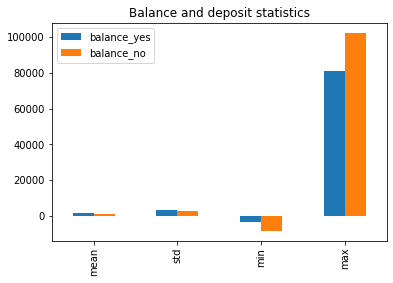

In [5]:
df = dataset_merged
b_df = pd.DataFrame()
b_df['balance_yes'] = (df[df['SUBSCRIPTION'] == 1][['SUBSCRIPTION','BALANCE']].describe())['BALANCE']
b_df['balance_no'] = (df[df['SUBSCRIPTION'] == 0][['SUBSCRIPTION','BALANCE']].describe())['BALANCE']

b_df
b_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Balance and deposit statistics')